# House Price Prediction (Regression Problem)
## A Beginner's Guide

- Exploratory Data Analysis (EDA) with Visualization
- Feature Extraction
- Data Modelling
- Model Evaluation

## Import Modules/Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from scipy import stats

## Load train and test dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Get data information

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.shape, test.shape

((1460, 81), (1459, 80))

Target variable *SalePrice* is more in train dataset. It's not present in test dataset. We have to predict *SalePrice* for test dataset.

In [7]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [142]:
# Description of all the features and their values
desc_file = open('data_description.txt')
print (desc_file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [8]:
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Correlation of Features with Target Variable

Most features (*OverallQual*, *GrLivArea*, *GarageCars*, etc.) have positive correlation with our target variable **SalesPrice** but some features (*BsmtFinSF2*, *BsmtHalfBath*, *YrSold*, etc.) have negative correlation as well.

In [11]:
corr = train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

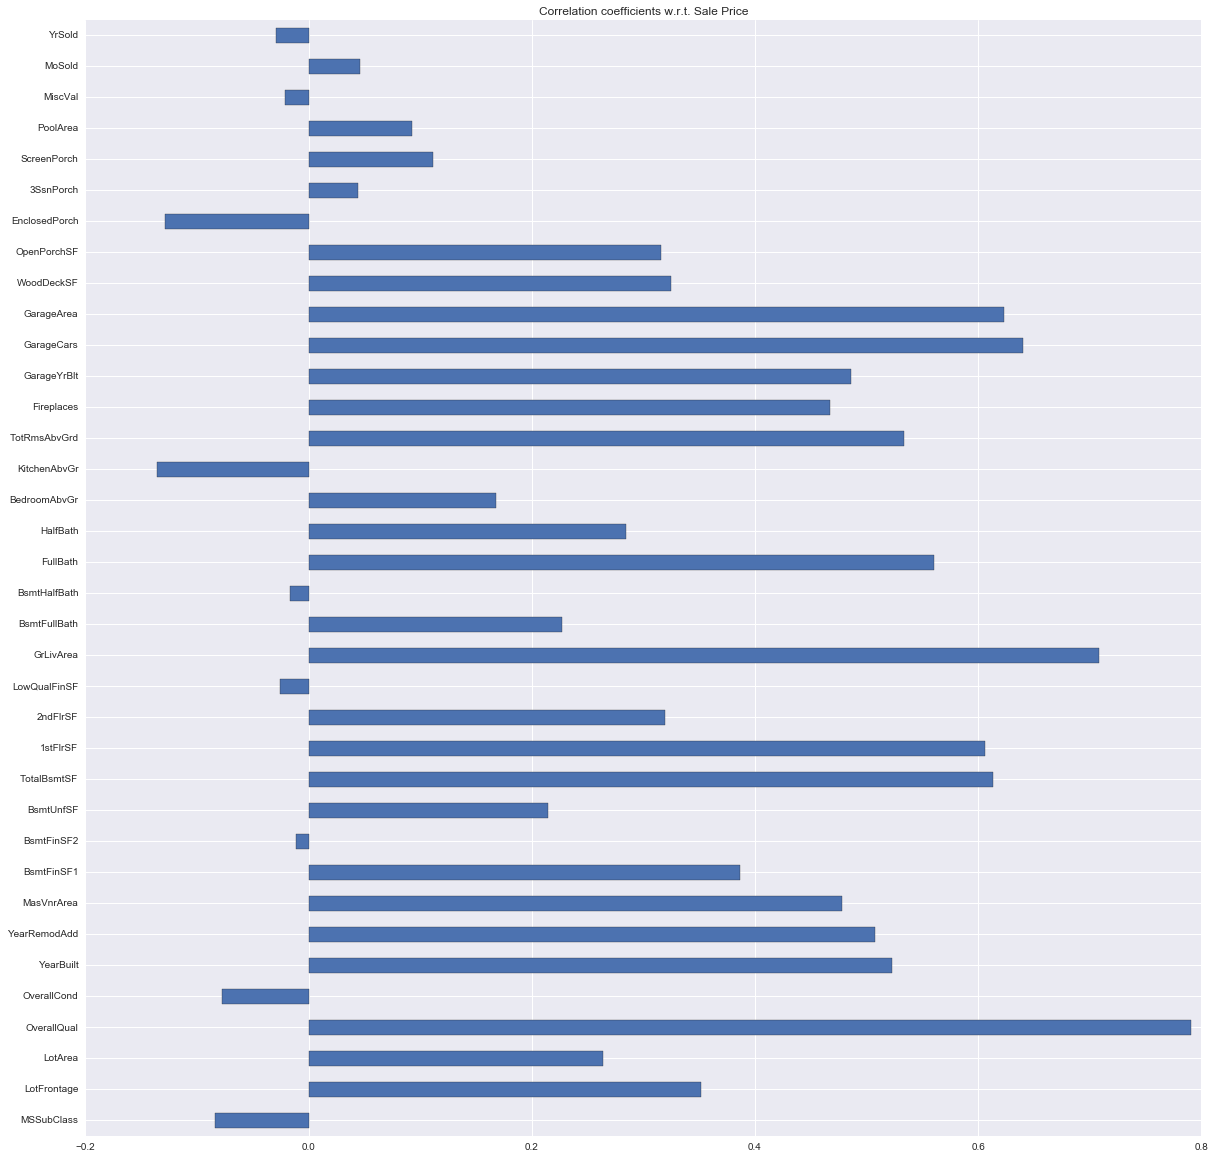

In [12]:
plt.figure(figsize=(20,20))
corr = corr[1:-1] # removing 1st (SalePrice) and last (Id) row from dataframe
corr.plot(kind='barh') # using pandas plot
plt.title('Correlation coefficients w.r.t. Sale Price')

### Heatmap of highly correlated features with respect to SalePrice

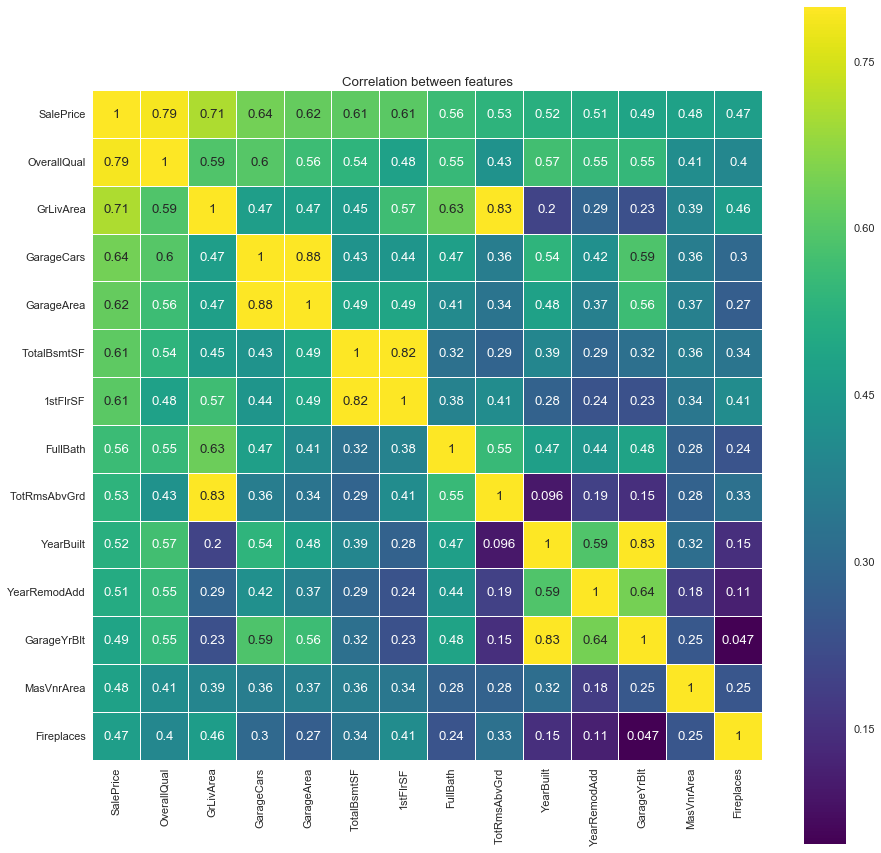

In [13]:
# taking high correlated variables having positive correlation of 45% and above
high_positive_correlated_variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', \
                               'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', \
                               'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']

corrMatrix = train[high_positive_correlated_variables].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');

## MultiCollinearity

From the above **heatmap**, we can see that some features (other than our target variable *SalePrice*) are highly correlated among themselves. Note the yellow blocks in the above heatmap. The following features are intercorrelated:

>TotRmsAbvGrd <> GrLivArea = 0.83
>
>GarageYrBlt <> YearBuilt = 0.83
>
>1stFlrSF <> TotalBsmtSF = 0.82
>
>GarageArea <> GarageCars = 0.88

*OverallQual* is the other feature which is highly correlated with our target variable *SalePrice*.

> SalePrice <> OverallQual = 0.79

This type of scenario results in **multicollinearity**. [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) occurs when there is moderate or high intercorrelation between independent variables. This can result in high standard error.

There are different ways to reduce multicollinearity like: 
   - removing the interrelated features 
   - creating a new feature by combining the interrelated features.


Let's see these features relation to *SalePrice* in overall data:

In [14]:
feature_variable = 'OverallQual'
target_variable = 'SalePrice'
train[[feature_variable, target_variable]].groupby([feature_variable], as_index=False).mean().sort_values(by=feature_variable, ascending=False)

,OverallQual,SalePrice
9,10,438588
8,9,367513
7,8,274735
6,7,207716
5,6,161603
4,5,133523
3,4,108420
2,3,87473
1,2,51770
0,1,50150


In [15]:
feature_variable = 'GarageCars'
target_variable = 'SalePrice'
train[[feature_variable, target_variable]].groupby([feature_variable], as_index=False).mean().sort_values(by=feature_variable, ascending=False)

,GarageCars,SalePrice
4,4,192655
3,3,309636
2,2,183851
1,1,128116
0,0,103317


Multicollinearity among independent variables as stated above are:

>TotRmsAbvGrd <> GrLivArea = 0.83
>
>GarageYrBlt <> YearBuilt = 0.83
>
>1stFlrSF <> TotalBsmtSF = 0.82
>
>GarageArea <> GarageCars = 0.88

Let's draw a **scatter plot** between *SalePrice* and some of the high correlated variables having positive correlation with respect to *SalePrice*. We take the following independent variables:

- **OverallQual**
- *TotRmsAbvGrd* and *GrLivArea* are correlated as stated above with 83%. Hence, we only take **GrLivArea** because it has higher correlation with *SalePrice* as compared to *TotalRmsAbvGrid*.
- *GarageArea* and *GarageCars* are correlated as stated above with 88%. Hence, we only take **GarageCars** because it has a bit higher correlation with *SalePrice* as compared to *GarageArea*.
- *1stFlrSF* and *TotalBsmtSF* are correlated with 82%. We keep **TotalBsmtSF** because it has a bit higher correlation with *SalePrice* as compared to *1stFlrSF*. 
- *GarageYrBlt* and *YearBuilt* are correlated as stated above with 83%. We keep **YearBuilt** because it has higher correlation with *SalePrice* as compared to *GarageYrBlt*.

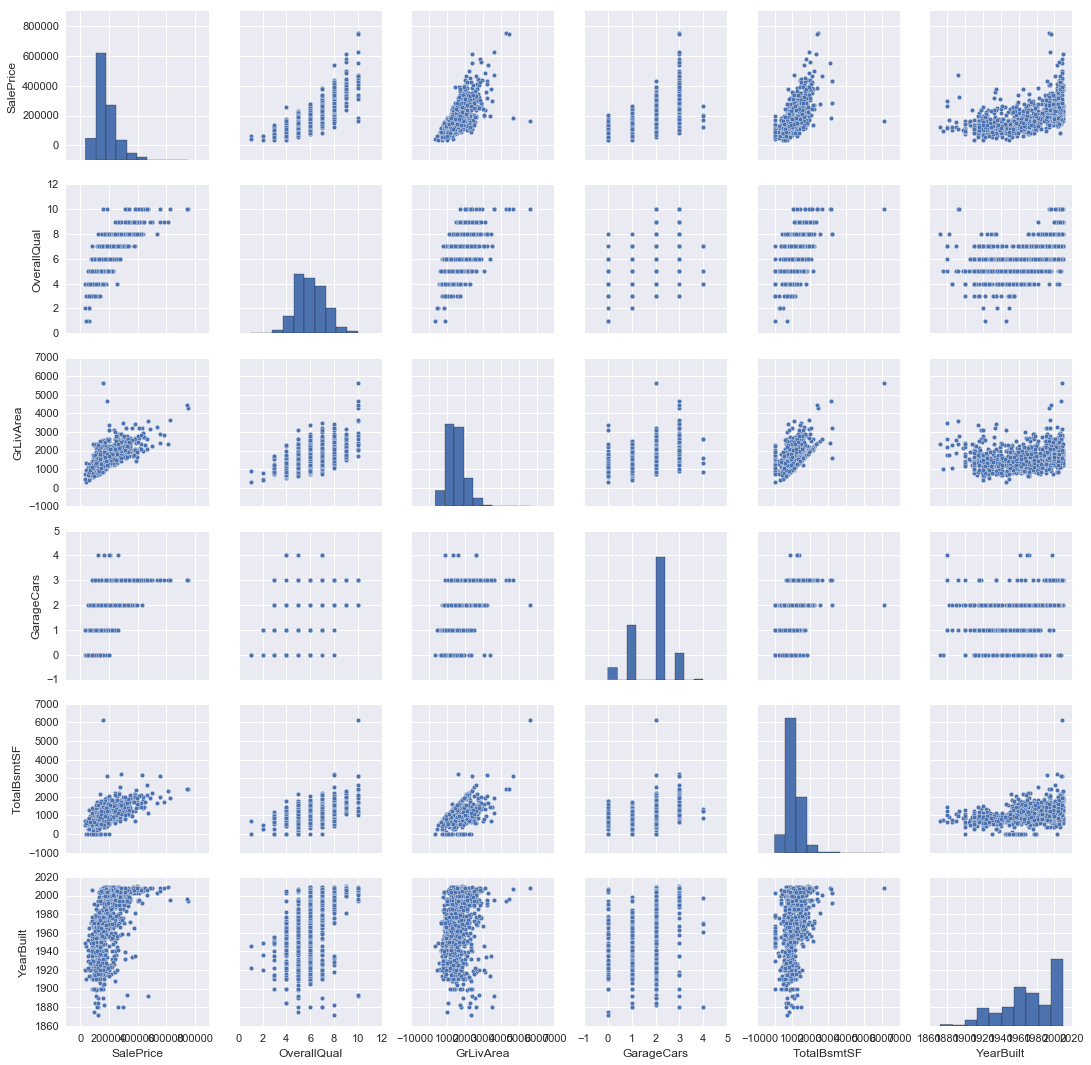

In [16]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)

From above scatter plot, we can see that: 
- *GrLivArea* and *TotalBsmtSF* are linearly related with *SalePrice*. The variables are positively related. When value of *GrLivArea* or *TotalBsmtSF* increases then *SalePrice* increases.
- *OverallQual* and *YearBuilt* are also positively related with *SalePrice*. 

Let's draw a box plot of *OverallQual* with respect to *SalePrice*.

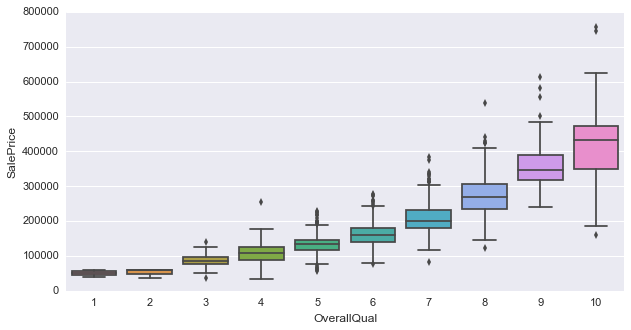

In [17]:
# box plot overallqual/saleprice
plt.figure(figsize=[10,5])
sns.boxplot(x='OverallQual', y="SalePrice", data=train)

## Analyzing Response / Dependent Variable (*SalePrice*) distribution

Let's analyze the distribution of *SalePrice* across our train dataset.

Here, we do **UNIVARIATE ANALYSIS**. It's a kind of data observation and analysis which involves only one variable at a time.

We analyze [Skewness](https://en.wikipedia.org/wiki/Skewness) and [Kurtosis](https://en.wikipedia.org/wiki/Kurtosis) of *SalePrice*.

**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

- ***negative skew:*** The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be *left-skewed*, *left-tailed*, or *skewed to the left*, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. 


- ***positive skew:*** The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be *right-skewed*, *right-tailed*, or *skewed to the right*, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data.

[**Kurtosis**](http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm) is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

Graphical representation of data distribution for ***SalePrice***:
- **Histogram** - For viewing Skewness and Kurtosis.
- **Normal Probability Plot** - For viewing how linearly the data is distribute. Data distribution should closely follow the diagonal that represents the normal distribution.



In [18]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

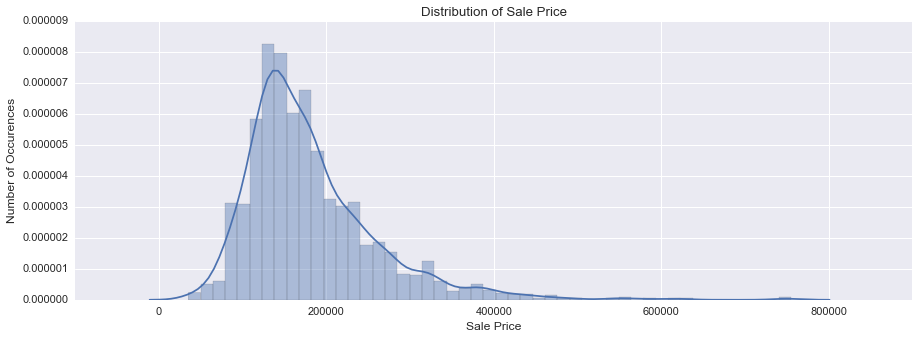

In [19]:
# histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurences')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519411, 180921.19589041095, 0.93196656415129875))

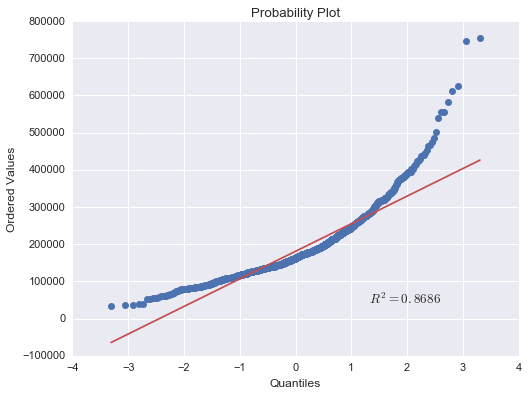

In [20]:
# normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'], plot=plt)

In [21]:
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


From the above computation and also from the above histogram, we can say that *SalePrice*: 
- is positively skewed or right skewed 
- have high kurtosis

High Kurtosis means that *SalePrice* has some outliners. We need to remove them so that they don't affect our prediction result.

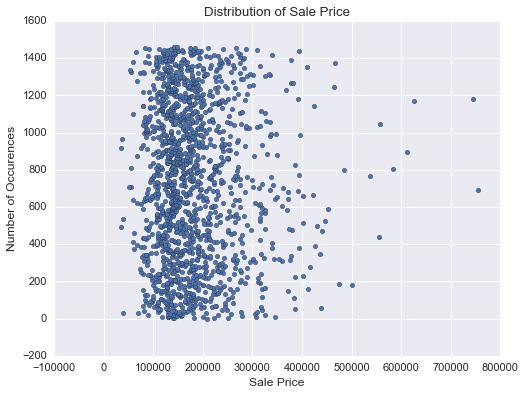

In [22]:
plt.figure(figsize=[8,6])
plt.scatter(train["SalePrice"].values, range(train.shape[0]))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price");
plt.ylabel("Number of Occurences")

Let's remove the extreme outliers as seen in the above figure.

In [23]:
# removing outliers
upperlimit = np.percentile(train.SalePrice.values, 99.5)
train['SalePrice'].loc[train['SalePrice']>upperlimit] = upperlimit # slicing dataframe upto the uppperlimit

/usr/lib/python2.7/dist-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


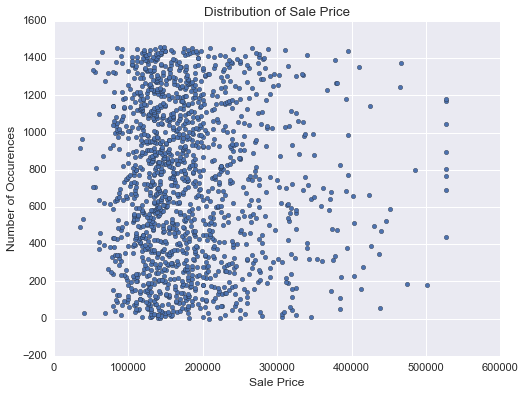

In [24]:
# plotting again the graph after removing outliers
plt.figure(figsize=[8,6])
plt.scatter(train["SalePrice"].values, range(train.shape[0]))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price");
plt.ylabel("Number of Occurences")

## Log Transformation

Another way of reducing skewness is by using **Log Transformation** method so that the data distribution become more linear. The logarithm function squeezes the larger values in your dataset and stretches out the smaller values.

Original value = $x$

New value after log-transformation = $log_{10}(x)$ = $x'$

$x = 1$ then $log_{10}(1) = 0 $

$x = 10$ then $log_{10}(10) = 1$

$x = 100$ then $log_{10}(100) = 2$

Let's **log transform** our target variable ***SalePrice*** values:

In [25]:
# applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

After applying log transformation, let's see the **histogram** and **normal probability** plot to see how has this affected *Skewness* and *Kurtosis* of the data. And, how normal and linear does the data distribution becomes.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.17558545,
          13.17558545,  13.17558545])),
 (0.39568317766527022, 12.023196041130895, 0.99577753714413431))

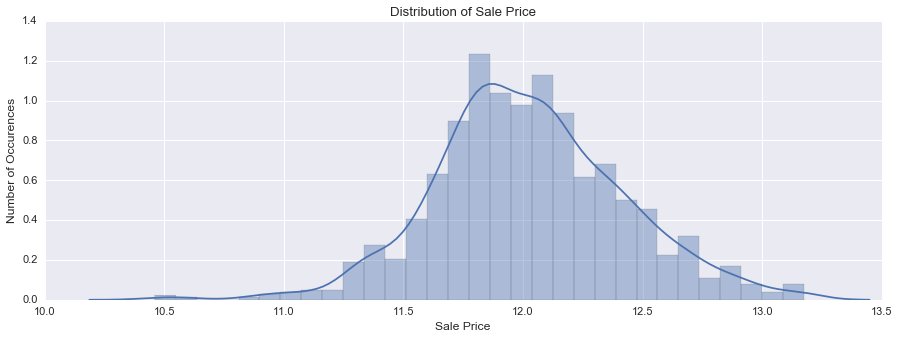

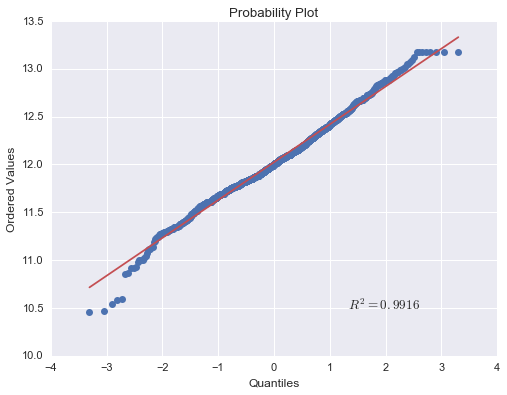

In [26]:
# histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurences')

# normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'], plot=plt)

Great! We can see that log transformation has worked well and data distribution of *SalePrice* has been changed from right skewed to normal.

In [27]:
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.062732
Kurtosis: 0.622026


## Analyzing Predictors / Independent Variables Distribution

Let's analyze the distribution of predictors or independent variables. 

Here, we do **MULTIVARIATE ANALYSIS**. It's a kind of data observation and analysis which involves two or more variables at a time.

### PoolArea, PoolQC vs SalePrice
Let's analyze Pool Area, Pool Quality and Sale Price's relationship.

**Note:** Sale price is not displayed in thousand value because it is log-transformed above.

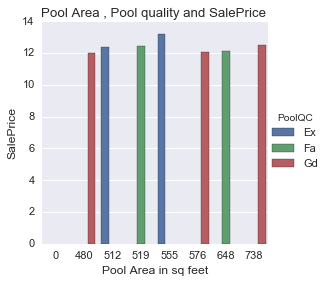

In [28]:
sns.factorplot(x="PoolArea",y="SalePrice",data=train,hue="PoolQC",kind='bar')
plt.title("Pool Area , Pool quality and SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet");

### Fireplaces, FireplaceQu vs SalePrice
Let's analyze number of Fireplaces, Fireplace Quality and Sale Price's relationship. 

**Note:** Sale price is not displayed in thousand value because it is log-transformed above.

Figure below shows that having 2 fireplaces increases sale price of the house. Excellent quality of Fireplace increases the sale price significantly.

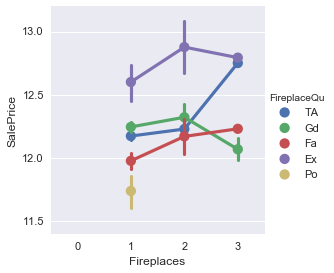

In [29]:
sns.factorplot("Fireplaces","SalePrice",data=train,hue="FireplaceQu");

In [30]:
pd.crosstab(train.Fireplaces, train.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


### GrLivArea vs SalePrice

Let's analyze ***GrLivArea*** variable with respect to our target/response variable ***SalePrice***.

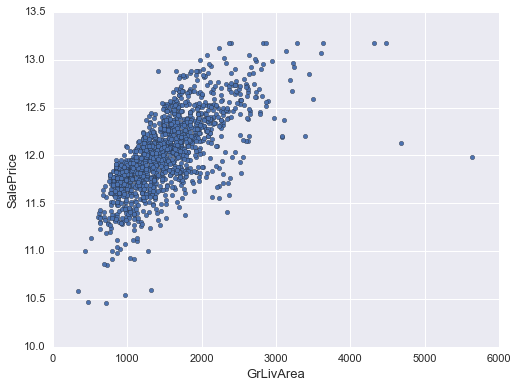

In [31]:
# scatter plot grlivarea/saleprice
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

Note at the bottom right of the above plot. This shows that two very large *GrLivArea* are having low *SalePrice*. These values are outliers for *GrLivArea*. 

Let's remove these outliers.

In [32]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

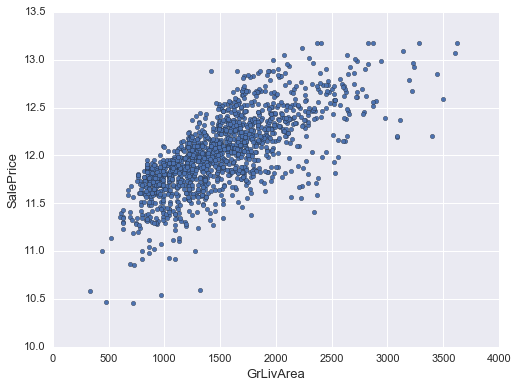

In [33]:
# Plot the graph again

# scatter plot grlivarea/saleprice
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

We have removed the extreme outliers from *GrLivArea* variable. Outliers can be present in other variables as well. But, removing outliers from all other variables may adversly affect our model because there can be outliers in test dataset as well. Solution to this will be to make the model more robust.

## Getting Missing Values

Let's first concatenate train and test dataset into a single dataframe named ***all_data***.

In [34]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2915, 80)

List variables with missing data with total number of missing rows along with the missing percentage.

In [35]:
null_columns = all_data.columns[all_data.isnull().any()]
total_null_columns = all_data[null_columns].isnull().sum()
percent_null_columns = ( all_data[null_columns].isnull().sum() / all_data[null_columns].isnull().count() )
missing_data = pd.concat([total_null_columns, percent_null_columns], axis=1, keys=['Total', 'Percent']).sort_values(by=['Percent'], ascending=False)
#missing_data.head()
missing_data

,Total,Percent
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageCond,159,0.054545
GarageQual,159,0.054545
GarageYrBlt,159,0.054545
GarageFinish,159,0.054545


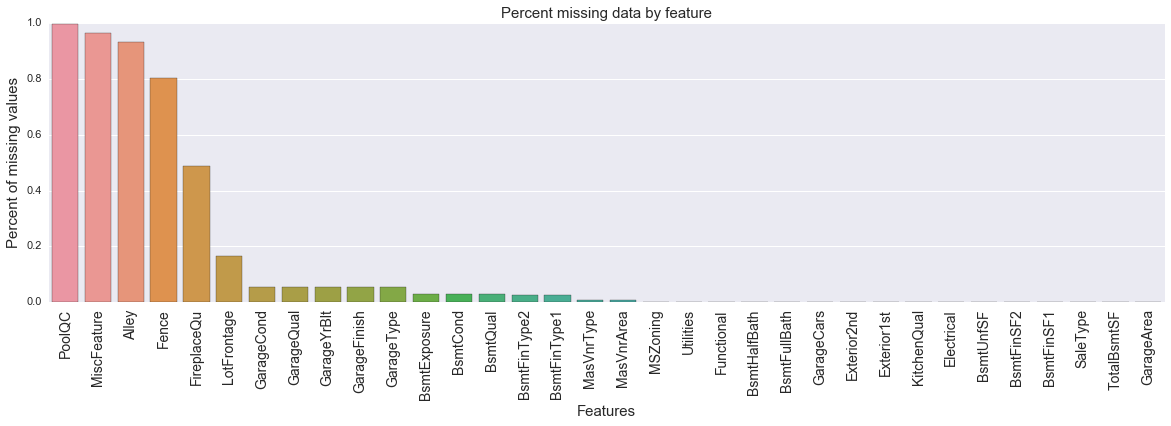

In [36]:
plt.figure(figsize=[20,5])
plt.xticks(rotation='90', fontsize=14)
sns.barplot(x=missing_data.index, y=missing_data.Percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Imputing Missing Values

Imputation/Imputing = Replacing missing data with substituted values.

### PoolQC

+99% values are missing for *PoolQC*. This means majority of houses have "no Pool" in them. We replace NULL values with "None".

In [37]:
# get unique values of the column data
all_data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [38]:
# replace null values with 'None'
all_data['PoolQC'].fillna('None', inplace=True)

In [39]:
# get unique values of the column data
all_data['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

### MiscFeature
+96% values are missing for *MiscFeature*. Null value or NA means "no misc feature" in the house.

In [40]:
# get unique values of the column data
all_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [41]:
# replace null values with 'None'
all_data['MiscFeature'].fillna('None', inplace=True)

### Alley
+93% values are missing for *Alley*. Null value or NA means "no alley access" in the house.

In [42]:
# get unique values of the column data
all_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [43]:
# replace null values with 'None'
all_data['Alley'].fillna('None', inplace=True)

### Fence
+80% values are missing for *Fence*. Null value or NA means "no fence" in the house.

In [44]:
# get unique values of the column data
all_data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [45]:
# replace null values with 'None'
all_data['Fence'].fillna('None', inplace=True)

### FireplaceQu
+48% values are missing for *FireplaceQu*. Null value or NA means "no fireplace" in the house.

In [46]:
# get unique values of the column data
all_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [47]:
# replace null values with 'None'
all_data['FireplaceQu'].fillna('None', inplace=True)

### LotFrontage
LotFrontage: Linear feet of street connected to property

16.67% values are missing for *LotFrontage*. We can assume that the distance of the street connected to the property (*LotFrontage*) will be same as that of that particular property's neighbor property (*Neighborhood*). 

We can fill the missing value by the median *LotFrontage* of all the *Neighborhood*.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

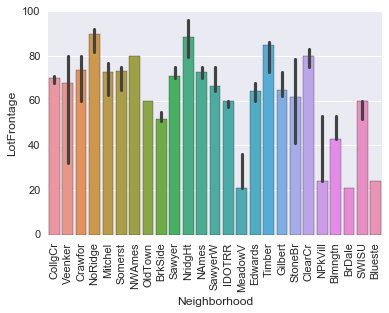

In [48]:
# barplot of median of LotFrontage with respect to Neighborhood
sns.barplot(data=train,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)

In [49]:
# get unique values of the column data
all_data['LotFrontage'].unique()

array([  65.,   80.,   68.,   60.,   84.,   85.,   75.,   nan,   51.,
         50.,   70.,   91.,   72.,   66.,  101.,   57.,   44.,  110.,
         98.,   47.,  108.,  112.,   74.,  115.,   61.,   48.,   33.,
         52.,  100.,   24.,   89.,   63.,   76.,   81.,   95.,   69.,
         21.,   32.,   78.,  121.,  122.,   40.,  105.,   73.,   77.,
         64.,   94.,   34.,   90.,   55.,   88.,   82.,   71.,  120.,
        107.,   92.,  134.,   62.,   86.,  141.,   97.,   54.,   41.,
         79.,  174.,   99.,   67.,   83.,   43.,  103.,   93.,   30.,
        129.,  140.,   35.,   37.,  118.,   87.,  116.,  150.,  111.,
         49.,   96.,   59.,   36.,   56.,  102.,   58.,   38.,  109.,
        130.,   53.,  137.,   45.,  106.,   42.,   39.,  104.,  144.,
        114.,  128.,  149.,  313.,  168.,  182.,  138.,  152.,  124.,
        153.,   46.,   26.,   25.,  119.,   31.,   28.,  117.,  113.,
        125.,  135.,  136.,   22.,  123.,  160.,  195.,  155.,  126.,
        200.,  131.,

In [50]:
# replace null values with median LotFrontage of all the Neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [51]:
all_data['LotFrontage'].unique()

array([  65. ,   80. ,   68. ,   60. ,   84. ,   85. ,   75. ,   51. ,
         50. ,   70. ,   72. ,   91. ,   73. ,   66. ,  101. ,   57. ,
         44. ,  110. ,   98. ,   47. ,  108. ,  112. ,   74. ,  115. ,
         67. ,   61. ,   48. ,   33. ,   64. ,   52. ,  100. ,   24. ,
         89. ,   63. ,   76. ,   81. ,   95. ,   69. ,   21. ,   32. ,
         78. ,  121. ,  122. ,   40. ,  105. ,   77. ,   94. ,   34. ,
         90. ,   80.5,   55. ,   88. ,   82. ,   71. ,  120. ,  107. ,
         92. ,  134. ,   62. ,   86. ,  141. ,   97. ,   72.5,   54. ,
         41. ,   79. ,  174. ,   99. ,   83. ,   43. ,  103. ,   93. ,
         30. ,   64.5,  129. ,  140. ,   35. ,   37. ,  118. ,   87. ,
        116. ,  150. ,  111. ,   49. ,   96. ,   59. ,   36. ,   56. ,
        102. ,   58. ,   38. ,  109. ,  130. ,   53. ,  137. ,   88.5,
         45. ,  106. ,   42. ,   39. ,  104. ,  144. ,  114. ,  128. ,
        149. ,  313. ,  168. ,  182. ,  138. ,  152. ,  124. ,  153. ,
      

### GarageType, GarageFinish, GarageQual and GarageCond
These are categorical (nominal) variables related to Garage. We replace their missing values with "None". None means no Garage in the house.

In [52]:
# get unique values of the column data
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    print (all_data[col].unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [53]:
# replace null values with 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col].fillna('None', inplace=True)

### GarageYrBlt, GarageArea and GarageCars
These are ordinal/numeric variables related to Garage. We replace their missing values with "0" (zero). Zero means no Garage in the house, so no Cars in Garage.

In [54]:
# get unique values of the column data
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    print (all_data[col].unique())

[ 2003.  1976.  2001.  1998.  2000.  1993.  2004.  1973.  1931.  1939.
  1965.  2005.  1962.  2006.  1960.  1991.  1970.  1967.  1958.  1930.
  2002.  1968.  2007.  2008.  1957.  1920.  1966.  1959.  1995.  1954.
  1953.    nan  1983.  1977.  1997.  1985.  1963.  1981.  1964.  1999.
  1935.  1990.  1945.  1987.  1989.  1915.  1956.  1948.  1974.  2009.
  1950.  1961.  1921.  1900.  1979.  1951.  1969.  1936.  1975.  1971.
  1923.  1984.  1926.  1955.  1986.  1988.  1916.  1932.  1972.  1918.
  1980.  1924.  1996.  1940.  1949.  1994.  1910.  1978.  1982.  1992.
  1925.  1941.  2010.  1927.  1947.  1937.  1942.  1938.  1952.  1928.
  1922.  1934.  1906.  1914.  1946.  1908.  1929.  1933.  1917.  1896.
  1895.  2207.  1943.  1919.]
[  548.   460.   608.   642.   836.   480.   636.   484.   468.   205.
   384.   736.   352.   840.   576.   516.   294.   853.   280.   534.
   572.   270.   890.   772.   319.   240.   250.   271.   447.   556.
   691.   672.   498.   246.     0.   440.   30

In [55]:
# replace null values with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col].fillna(0, inplace=True)

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
These are categorical (nominal) variables related to Basement. We replace their missing values with "None". None means no Basement in the house.

In [56]:
# get unique values of the column data
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    print (all_data[col].unique())

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [57]:
# replace null values with 'None'
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None', inplace=True)

### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath
These are ordinal/numeric variables related to Basement. We replace their missing values with "0" (zero). Zero means no Basement in the house.

In [58]:
# replace null values with 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0, inplace=True)

### MasVnrArea, MasVnrType
NA for *MasVnrArea* and *MasVnrType* means there is "no masonry veneer" for the house. We replace the NA value of nominal/categorical feature *MasVnrType* with "None" and the NA value of ordinal feature *MasVnrArea* with 0 (zero).

In [59]:
all_data["MasVnrType"].fillna("None", inplace=True)
all_data["MasVnrArea"].fillna(0, inplace=True)

### MSZoning, Utilities, Functional, Exterior2nd, Exterior1st, KitchenQual, Electrical, SaleType
All of these features are nominal/categorical. Each of them has less than 5 missing values. We replace the missing values of each feature by the most common value for that particular feature.

In [60]:
for col in ('MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'Electrical', 'SaleType'):
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

## Recheck Columns for Missing Values
Now, there are no columns with missing values.

In [61]:
null_columns = all_data.columns[all_data.isnull().any()]
print (null_columns)

Index([], dtype='object')


## Reducing Skewness of Predictors (Independent Variables)
Earlier in this notebook, we have reduced the Skewness of our target variable *SalePrice*. We did it through **Log Transformation**. We will apply the same for all other *numeric* dependent variables having high skewness.

Let's check the Skewness of numeric dependent variables:

In [62]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
#print (numeric_features)

skewness = []
for col in numeric_features:
    skewness.append( (col, all_data[col].skew()) )
    
pd.DataFrame(skewness, columns=('Feature', 'Skewness')).sort_values(by='Skewness', ascending=False)

,Feature,Skewness
24,MiscVal,21.943440
29,PoolArea,18.711459
19,LotArea,13.130516
21,LowQualFinSF,12.086535
2,3SsnPorch,11.373947
18,KitchenAbvGr,4.301059
5,BsmtFinSF2,4.144996
9,EnclosedPorch,4.002856
30,ScreenPorch,3.945539
7,BsmtHalfBath,3.944922


### Unskewing Data
We will use **Log Transformation** to reduce the Skewness of the positively skewed features.

In [63]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706,0,...,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978,0,...,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486,0,...,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216,0,...,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655,0,...,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [64]:
positively_skewed_features = all_data[numeric_features].columns[abs(all_data[numeric_features].skew()) > 1]
#print (positively_skewed_features)

# applying log transformation
for col in positively_skewed_features:
    all_data[col] = np.log(np.ma.array(all_data[col], mask=(all_data[col]<=0))) # using masked array to ignore log transformation of 0 values as (log 0) is undefined

In [65]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.752270,854,1,None,3,1Fam,TA,No,706,1,...,WD,1,Pave,8,856,AllPub,1.000000,2003,2003,2008
1,7.140453,0,1,None,3,1Fam,TA,Gd,978,1,...,WD,1,Pave,6,1262,AllPub,5.697093,1976,1976,2007
2,6.824374,866,1,None,3,1Fam,TA,Mn,486,1,...,WD,1,Pave,6,920,AllPub,1.000000,2001,2002,2008
3,6.867974,756,1,None,3,1Fam,Gd,No,216,1,...,WD,1,Pave,7,756,AllPub,1.000000,1915,1970,2006
4,7.043160,1053,1,None,4,1Fam,TA,Av,655,1,...,WD,1,Pave,9,1145,AllPub,5.257495,2000,2000,2008


In [66]:
%%HTML
<style>
  table {margin-left: 0 !important;}
</style>

## Creating Dummy Categorical Features

Dummy variables are used to convert categorical/nominal features into quantitative one. A new column is created for each unique category of a nominal/categorical column. Values in that newly created column will be either 1 or 0.

Let's take an example of a column named "Sex" which has two values "male" and "female". If we create dummy variables for this column then two new columns will be added with name "male" and "female". For any row, if the "Sex" value is 'male' then the "male" column will have value 1 and "female" column will have value 0. Similary, if the "Sex" value is 'female' then the "male" column will have value 0 and "female" column will have value 1.

**BEFORE**

| Row | Sex     |
| ------------- |
| 1   | male    |
| 2   | female  |
| 3   | female  |
| 4   | male    |

**AFTER CREATING DUMMY VARIABLES**

| Row | Sex     | male | female |
| ------------- | ------------- |
| 1   | male    | 1    | 0      |
| 2   | female  | 0    | 1      |
| 3   | female  | 0    | 1      |
| 4   | male    | 1    | 0      |

We will now create dummy variables for all our categorical/nominal features.

In [67]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 302)


## Getting new Train and Test dataset

We are done with Feature Engineering part. We will not split ***all_data*** into train and test dataset.

In [68]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [69]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.752270,854,1,3,706,1,1,1,150,1.000000,...,0,0,0,0,0,1,0,1,1,0
1,7.140453,0,1,3,978,1,0,0,284,1.000000,...,0,0,0,0,0,1,0,1,1,0
2,6.824374,866,1,3,486,1,1,1,434,1.000000,...,0,0,0,0,0,1,0,1,1,0
3,6.867974,756,1,3,216,1,1,1,540,5.605802,...,0,0,0,0,0,1,0,1,1,0
4,7.043160,1053,1,4,655,1,1,1,490,1.000000,...,0,0,0,0,0,1,0,1,1,0


In [70]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1456,6.797940,0,1,2,468,4.969813,0,1,270,1,...,0,0,0,0,0,1,0,1,1,0
1457,7.192182,0,1,3,923,1.000000,0,1,406,1,...,0,0,0,0,0,1,0,1,1,0
1458,6.833032,701,1,3,791,1.000000,0,1,137,1,...,0,0,0,0,0,1,0,1,1,0
1459,6.830874,678,1,3,602,1.000000,0,1,324,1,...,0,0,0,0,0,1,0,1,1,0
1460,7.154615,0,1,2,263,1.000000,0,1,1017,1,...,0,0,0,0,0,1,0,1,1,0


## Modelling

Here, we create different regression models and evaluate the **Root Mean Square Error (RMSE)** of predictions done by those models. The [root-mean-square error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is a frequently used measure of the differences between values predicted by a model or an estimator and the values actually observed.

**Note: **

> Scikit-Learn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better).

> Mean Square Error (MSE) ranges from 0 to 1. Generally, low error means better model. But, in case of scikit-learn, high MSE means better model. So, if our MSE value is 0.9 then we can say that our model is performing better as compared to MSE value 0.2.

> To revert this behavior of scikit-learn, we can use "scoring" parameter in "cross_val_scores" function like this: 

> cv_score = cross_val_score(lasso, train.drop(['Id'], axis=1), y_train, scoring="neg_mean_squared_error", cv=5) 

We will be testing the following Regression Models for this House Price problem:

- Lasso
- Elastic Net
- Kernel Ridge
- Gradient Boost
- XGBoost
- LightGBM

Let's first import the model libraries.

In [90]:
# importing model libraries
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### Defining train and test data to train model

In [78]:
X_train = train.drop(['Id'], axis=1)
# y_train has been defined above where we combined train and test data to create all_data
X_test = test.drop(['Id'], axis=1)

### Lasso Regression
*RobustScaler()* method is added to the pipeline to make the model less sensitive to outliers.

In [91]:
#lasso = Lasso(alpha =0.0005, random_state=1)
#lasso = Lasso()
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005))
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_lasso, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[ 0.10605609  0.11134129  0.11972374  0.10013615  0.10878121]
SCORE (mean: 0.109208 , std: 0.006443)


### ElasticNet Regression

*RobustScaler()* method is added to the pipeline to make the model less sensitive to outliers.

In [92]:
model_elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005))
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_elastic_net, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[ 0.10609503  0.11304797  0.12187797  0.10023517  0.11022137]
SCORE (mean: 0.110296 , std: 0.007219)


### Kernel Ridge Regression

In [94]:
model_kernel_ridge = KernelRidge(alpha=0.6)
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_kernel_ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[ 0.11446846  0.12290098  0.12999278  0.10554083  0.11596478]
SCORE (mean: 0.117774 , std: 0.008239)


### Gradient Boosting Regression

*loss='huber'* is added as parameter to make the model less sensitive to outliers.

In [95]:
model_gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=5)

# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_gboost, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[ 0.10909226  0.12793872  0.12617292  0.1056675   0.11093377]
SCORE (mean: 0.115961 , std: 0.009232)


### XGBoost (eXtreme Gradient Boosting)

[XGBoost](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/) is an implementation of gradient boosted decision trees designed for speed and performance.

In [96]:
model_xgboost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=True, nthread = -1)

# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_xgboost, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[ 0.10494045  0.11890447  0.12197608  0.11011517  0.11316734]
SCORE (mean: 0.113821 , std: 0.006089)


### LightGBM (Light Gradient Boosting)

[Light GBM](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/) is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.

In [97]:
model_lgbm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_lgbm, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[ 0.111941    0.12426593  0.12385647  0.10825406  0.11497446]
SCORE (mean: 0.116658 , std: 0.006410)


## Generate Predictions

### Training our regression model

We have already done Cross Validation before but Cross Validation fits the classifier on different subsets of dataset, and then averages their scores. It is a common practice to train/fit classifier on full dataset after it has shown sufficient score in Cross Validation.

Hence, here we train our models with fit method, i.e. we fit our models with the predictors (X_train) and outcome (y_train) so that it can learn and predict the outcome in future.

In [104]:
model_lasso.fit(X_train, y_train)
model_elastic_net.fit(X_train, y_train)
model_kernel_ridge.fit(X_train, y_train)
model_gboost.fit(X_train, y_train)
model_xgboost.fit(X_train, y_train)
model_lgbm.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', colsample_bytree=1, feature_fraction=0.2319,
       feature_fraction_seed=9, learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=10, min_child_weight=5,
       min_data_in_leaf=6, min_split_gain=0, min_sum_hessian_in_leaf=11,
       n_estimators=720, nthread=-1, num_leaves=5, objective='regression',
       reg_alpha=0, reg_lambda=0, seed=0, silent=True, subsample=1,
       subsample_for_bin=50000, subsample_freq=1)

### Generating Prediction on Training data

Above, we have trained our model with the training dataset. Here, use those trained models to generate predition on the training data itself. And then calculate the Root Mean Squre Error (RMSE) of those predictions. 

This can show how accurately the model predict the data that it has already seen before. The result below shows that ***Gradient Boosting*** model has the most accurate predictions for already learned data.

In [122]:
dict_models = {'lasso':model_lasso, 'elastic_net':model_elastic_net, 'kernel_ridge':model_kernel_ridge, 
            'gboost':model_gboost, 'xgboost':model_xgboost, 'lgbm':model_lgbm}

for key, value in dict_models.items():
    pred_train = value.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, pred_train))
    print ("%s: %f" % (key, rmse))

kernel_ridge: 0.089563
lgbm: 0.072244
xgboost: 0.078819
gboost: 0.051333
elastic_net: 0.094859
lasso: 0.098365


### Generate Predictions on Test dataset

We use **np.expm1()** function. This calculates $exp(x) - 1$ for all elements in the array. This is needed here because we have log transformed the *SalePrice* earlier to reduce the Skewness of *SalePrice* data distribution.

In [128]:
prediction_lasso = np.expm1(model_lasso.predict(X_test))
prediction_elastic_net = np.expm1(model_elastic_net.predict(X_test))
prediction_kernel_ridge = np.expm1(model_kernel_ridge.predict(X_test))
prediction_gboost = np.expm1(model_gboost.predict(X_test))

prediction_xgboost = np.expm1(model_xgboost.predict(X_test))
prediction_lgbm = np.expm1(model_lgbm.predict(X_test))

### Different combinations of Predictions

We can try different prediction combination before generating the Kaggle submission file. We can try single prediction model or an average of two or more prediction model.

I got better result on Kaggle score while combining prediction *Lasso* and *Elastic Net* models and taking the average of their prediction.

In [131]:
# kaggle score: 0.12346
#prediction = prediction_gboost

# kaggle score: 0.12053
#prediction = (prediction_lasso + prediction_xgboost) / float(2) 

# kaggle score: 0.11960
#prediction = prediction_lasso 

# kaggle score: 0.11937
prediction = (prediction_lasso + prediction_elastic_net) / float(2) 

#print prediction

## Create Submission File to Kaggle

In [132]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": prediction
    })

#submission.to_csv('submission.csv', index=False)

## References

This notebook is created by learning from these awesome notebooks:

- [House Prices - Data Exploration and Visualisation](https://www.kaggle.com/poonaml/house-prices-data-exploration-and-visualisation)
- [Stacked Regressions : Top 4% on LeaderBoard](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)
- [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
